In [4]:
import pandas as pd
import numpy as np
import statistics as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from pylab import savefig
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import datetime

In [5]:
data = pd.read_csv(r"C:\Users\Sheikh Nabil\Anaconda\Desktop\capital-bike-share\Data Wrangling\2020\202011-capitalbikeshare-tripdata.csv")

In [6]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175430,D98EF4B739FF3C36,electric_bike,2020-11-10 14:42:04,2020-11-10 14:59:03,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865020,-77.039472,38.876597,-77.017833,member
175431,CB1A83E00AC9C520,docked_bike,2020-11-09 17:38:48,2020-11-09 17:59:35,Reston Town Center Transit Station,32214.0,Town Center Pkwy & Bowman Towne Dr,32210.0,38.957037,-77.359718,38.962524,-77.361902,casual
175432,9CE3A41A63C76D00,docked_bike,2020-11-21 14:57:29,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member
175433,A02C91053ACCD678,docked_bike,2020-11-21 14:57:08,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member


In [7]:
data['started_at'] = pd.to_datetime(data['started_at'])

data['date'] = data['started_at'].dt.date

data['time'] = data['started_at'].dt.time
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual,2020-11-02,18:41:34
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member,2020-11-07,17:24:13
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual,2020-11-20,13:28:22
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual,2020-11-25,16:02:34
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual,2020-11-21,10:55:34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175430,D98EF4B739FF3C36,electric_bike,2020-11-10 14:42:04,2020-11-10 14:59:03,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865020,-77.039472,38.876597,-77.017833,member,2020-11-10,14:42:04
175431,CB1A83E00AC9C520,docked_bike,2020-11-09 17:38:48,2020-11-09 17:59:35,Reston Town Center Transit Station,32214.0,Town Center Pkwy & Bowman Towne Dr,32210.0,38.957037,-77.359718,38.962524,-77.361902,casual,2020-11-09,17:38:48
175432,9CE3A41A63C76D00,docked_bike,2020-11-21 14:57:29,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member,2020-11-21,14:57:29
175433,A02C91053ACCD678,docked_bike,2020-11-21 14:57:08,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member,2020-11-21,14:57:08


In [8]:
data['member_casual'].value_counts()

member    101504
casual     73931
Name: member_casual, dtype: int64

In [9]:
data['date'] = pd.to_datetime(data['date'])
data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
time                          object
dtype: object

In [10]:
print(data.index)

RangeIndex(start=0, stop=175435, step=1)


In [11]:
dt = data['end_station_name'].value_counts()
dt

15th & P St NW                  1856
New Hampshire Ave & T St NW     1843
1st & M St NE                   1608
14th & V St NW                  1559
Jefferson Dr & 14th St SW       1551
                                ... 
19th & Savannah St SE              1
Ridge Rd Community Center          1
Fern St & Army Navy Dr             1
Reston Pkwy & Spectrum Dr          1
Jones Branch & Westbranch Dr       1
Name: end_station_name, Length: 613, dtype: int64

In [12]:
dt.head(30)

15th & P St NW                                           1856
New Hampshire Ave & T St NW                              1843
1st & M St NE                                            1608
14th & V St NW                                           1559
Jefferson Dr & 14th St SW                                1551
Henry Bacon Dr & Lincoln Memorial Circle NW              1504
Lincoln Memorial                                         1492
4th St & Madison Dr NW                                   1446
8th & O St NW                                            1311
15th & W St NW                                           1306
11th & M St NW                                           1293
Massachusetts Ave & Dupont Circle NW                     1280
4th & M St SW                                            1276
14th & R St NW                                           1261
New Hampshire Ave & Ward Pl NW                           1256
17th & Corcoran St NW                                    1254
3rd & M 

In [13]:
data.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at                      object
start_station_name            object
start_station_id             float64
end_station_name              object
end_station_id               float64
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
date                  datetime64[ns]
time                          object
dtype: object

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175435 entries, 0 to 175434
Data columns (total 15 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             175435 non-null  object        
 1   rideable_type       175435 non-null  object        
 2   started_at          175435 non-null  datetime64[ns]
 3   ended_at            175435 non-null  object        
 4   start_station_name  160325 non-null  object        
 5   start_station_id    160325 non-null  float64       
 6   end_station_name    158773 non-null  object        
 7   end_station_id      158773 non-null  float64       
 8   start_lat           175435 non-null  float64       
 9   start_lng           175435 non-null  float64       
 10  end_lat             174813 non-null  float64       
 11  end_lng             174813 non-null  float64       
 12  member_casual       175435 non-null  object        
 13  date                175435 no

In [15]:
data.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name    15110
start_station_id      15110
end_station_name      16662
end_station_id        16662
start_lat                 0
start_lng                 0
end_lat                 622
end_lng                 622
member_casual             0
date                      0
time                      0
dtype: int64

In [16]:
data['Week_Number'] = data['date'].dt.week
data

<ipython-input-16-c1d31c5a6d20>:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  data['Week_Number'] = data['date'].dt.week


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
0,EAF58AB55323A15E,docked_bike,2020-11-02 18:41:34,2020-11-02 18:49:04,17th & K St NW / Farragut Square,31233.0,15th & P St NW,31201.0,38.902061,-77.038322,38.909868,-77.034421,casual,2020-11-02,18:41:34,45
1,DBD5BC10E1F0C019,docked_bike,2020-11-07 17:24:13,2020-11-07 17:24:48,New Jersey Ave & F St NW,31655.0,New Jersey Ave & F St NW,31655.0,38.897108,-77.011616,38.897108,-77.011616,member,2020-11-07,17:24:13,45
2,64776A208DCED86D,docked_bike,2020-11-20 13:28:22,2020-11-20 14:19:26,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049437,38.892244,-77.033234,casual,2020-11-20,13:28:22,47
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual,2020-11-25,16:02:34,48
4,98DEA3EA1A85634F,docked_bike,2020-11-21 10:55:34,2020-11-21 11:12:45,Metro Center / 12th & G St NW,31230.0,2nd & G St NE,31639.0,38.898364,-77.027869,38.899670,-77.003666,casual,2020-11-21,10:55:34,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175430,D98EF4B739FF3C36,electric_bike,2020-11-10 14:42:04,2020-11-10 14:59:03,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865020,-77.039472,38.876597,-77.017833,member,2020-11-10,14:42:04,46
175431,CB1A83E00AC9C520,docked_bike,2020-11-09 17:38:48,2020-11-09 17:59:35,Reston Town Center Transit Station,32214.0,Town Center Pkwy & Bowman Towne Dr,32210.0,38.957037,-77.359718,38.962524,-77.361902,casual,2020-11-09,17:38:48,46
175432,9CE3A41A63C76D00,docked_bike,2020-11-21 14:57:29,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member,2020-11-21,14:57:29,47
175433,A02C91053ACCD678,docked_bike,2020-11-21 14:57:08,2020-11-21 15:20:51,Gravelly Point,31064.0,4th & M St SW,31108.0,38.865029,-77.039511,38.876697,-77.017898,member,2020-11-21,14:57:08,47


In [17]:
data['date'].min()

Timestamp('2020-11-01 00:00:00')

In [18]:
w_48 = data[data['Week_Number'] == 48]
w_48

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual,2020-11-25,16:02:34,48
16,A894ADB87D7F8138,docked_bike,2020-11-23 00:33:32,2020-11-23 01:16:56,Lincoln Memorial,31258.0,17th & G St NW,31277.0,38.888255,-77.049437,38.898283,-77.039732,casual,2020-11-23,00:33:32,48
27,807753A54E6DEF87,docked_bike,2020-11-26 15:35:27,2020-11-26 16:06:03,Lincoln Memorial,31258.0,4th St & Madison Dr NW,31288.0,38.888255,-77.049436,38.890496,-77.017246,casual,2020-11-26,15:35:27,48
39,8C60D3DDB7DD7A98,docked_bike,2020-11-23 15:56:10,2020-11-23 16:38:30,Lincoln Memorial,31258.0,USDA / 12th & C St SW,31217.0,38.888255,-77.049437,38.886277,-77.028242,casual,2020-11-23,15:56:10,48
41,343A469556B17DF8,docked_bike,2020-11-29 16:20:31,2020-11-29 17:11:47,8th & East Capitol St NE,31629.0,4th & East Capitol St NE,31618.0,38.889988,-76.995193,38.889955,-77.000349,casual,2020-11-29,16:20:31,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175415,AEF729E5C833E3B6,docked_bike,2020-11-26 14:03:09,2020-11-26 14:14:03,Gravelly Point,31064.0,Crystal Dr & 20th St S,31002.0,38.865029,-77.039511,38.856425,-77.049232,casual,2020-11-26,14:03:09,48
175420,542988D884151DDA,docked_bike,2020-11-24 07:31:03,2020-11-24 07:35:48,King St Metro North / Cameron St,31098.0,Braddock Rd Metro,31047.0,38.807040,-77.059817,38.814577,-77.052808,member,2020-11-24,07:31:03,48
175424,19A69E471A0359A1,docked_bike,2020-11-25 07:30:45,2020-11-25 07:35:28,King St Metro North / Cameron St,31098.0,Braddock Rd Metro,31047.0,38.807040,-77.059817,38.814577,-77.052808,member,2020-11-25,07:30:45,48
175428,80A9FA800D2B2F19,electric_bike,2020-11-29 15:08:56,2020-11-29 15:33:46,Van Ness Metro / UDC,31300.0,M St & Pennsylvania Ave NW,31246.0,38.944547,-77.063900,38.905089,-77.056939,member,2020-11-29,15:08:56,48


In [19]:
w_48.loc[w_48['date'] == '2020-11-23', 'Day'] = 'Monday'
w_48.loc[w_48['date'] == '2020-11-24', 'Day'] = 'Tuesday'
w_48.loc[w_48['date'] == '2020-11-25', 'Day'] = 'Wednesday'
w_48.loc[w_48['date'] == '2020-11-26', 'Day'] = 'Thursday'
w_48.loc[w_48['date'] == '2020-11-27', 'Day'] = 'Friday'
# w_48.loc[w_48['date'] == '2020-11-28', 'Day'] = 'Saturday'
# w_48.loc[w_48['date'] == '2020-11-29', 'Day'] = 'sunday'
w_48

C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Anaconda2\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,time,Week_Number,Day
3,B870C5DC875CA903,docked_bike,2020-11-25 16:02:34,2020-11-25 16:31:31,Lincoln Memorial,31258.0,15th St & Constitution Ave NW,31321.0,38.888255,-77.049436,38.892244,-77.033234,casual,2020-11-25,16:02:34,48,Wednesday
16,A894ADB87D7F8138,docked_bike,2020-11-23 00:33:32,2020-11-23 01:16:56,Lincoln Memorial,31258.0,17th & G St NW,31277.0,38.888255,-77.049437,38.898283,-77.039732,casual,2020-11-23,00:33:32,48,Monday
27,807753A54E6DEF87,docked_bike,2020-11-26 15:35:27,2020-11-26 16:06:03,Lincoln Memorial,31258.0,4th St & Madison Dr NW,31288.0,38.888255,-77.049436,38.890496,-77.017246,casual,2020-11-26,15:35:27,48,Thursday
39,8C60D3DDB7DD7A98,docked_bike,2020-11-23 15:56:10,2020-11-23 16:38:30,Lincoln Memorial,31258.0,USDA / 12th & C St SW,31217.0,38.888255,-77.049437,38.886277,-77.028242,casual,2020-11-23,15:56:10,48,Monday
41,343A469556B17DF8,docked_bike,2020-11-29 16:20:31,2020-11-29 17:11:47,8th & East Capitol St NE,31629.0,4th & East Capitol St NE,31618.0,38.889988,-76.995193,38.889955,-77.000349,casual,2020-11-29,16:20:31,48,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175415,AEF729E5C833E3B6,docked_bike,2020-11-26 14:03:09,2020-11-26 14:14:03,Gravelly Point,31064.0,Crystal Dr & 20th St S,31002.0,38.865029,-77.039511,38.856425,-77.049232,casual,2020-11-26,14:03:09,48,Thursday
175420,542988D884151DDA,docked_bike,2020-11-24 07:31:03,2020-11-24 07:35:48,King St Metro North / Cameron St,31098.0,Braddock Rd Metro,31047.0,38.807040,-77.059817,38.814577,-77.052808,member,2020-11-24,07:31:03,48,Tuesday
175424,19A69E471A0359A1,docked_bike,2020-11-25 07:30:45,2020-11-25 07:35:28,King St Metro North / Cameron St,31098.0,Braddock Rd Metro,31047.0,38.807040,-77.059817,38.814577,-77.052808,member,2020-11-25,07:30:45,48,Wednesday
175428,80A9FA800D2B2F19,electric_bike,2020-11-29 15:08:56,2020-11-29 15:33:46,Van Ness Metro / UDC,31300.0,M St & Pennsylvania Ave NW,31246.0,38.944547,-77.063900,38.905089,-77.056939,member,2020-11-29,15:08:56,48,NaN


In [20]:
w_48.isnull().sum()

ride_id                   0
rideable_type             0
started_at                0
ended_at                  0
start_station_name     3102
start_station_id       3102
end_station_name       3411
end_station_id         3411
start_lat                 0
start_lng                 0
end_lat                  89
end_lng                  89
member_casual             0
date                      0
time                      0
Week_Number               0
Day                   12528
dtype: int64

In [21]:
w_48['Day'].value_counts()

Friday       5687
Tuesday      4391
Thursday     4191
Wednesday    4165
Monday       3968
Name: Day, dtype: int64

In [22]:
df_plot = w_48.groupby(['member_casual', 'Day']).size().reset_index().pivot(columns='member_casual', index='Day', values=0)
df_plot.sort_values

<bound method DataFrame.sort_values of member_casual  casual  member
Day                          
Friday           2999    2688
Monday           1272    2696
Thursday         2115    2076
Tuesday          1537    2854
Wednesday        1587    2578>

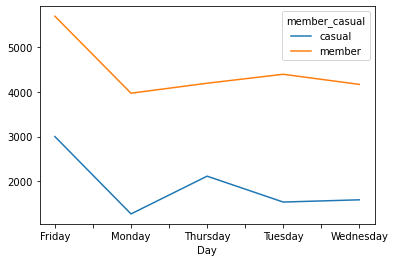

In [23]:
df_plot.plot(kind='line', stacked=True);

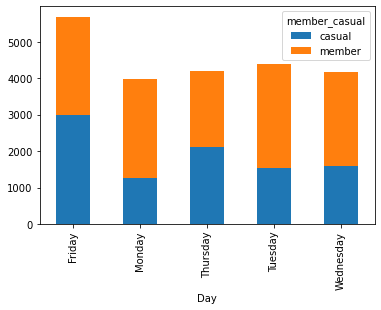

In [24]:
df_plot.plot(kind='bar', stacked=True);